<a href="https://it-omscholing.nl/locaties/hogeschool-rotterdam/">
<div>
<a><img src='pics/banner.PNG'/></a>
</div>
<div>
<a href=''><img src='pics/miw.PNG'/></a>
<em>Author: Jeroen Boogaard</em>
</div>
</a>

<h1>Practicum Computer Vision</h1>

<h2>Imports<h2>

In [1]:
from PIL import Image
import io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
from sklearn.model_selection import train_test_split
import random
import requests
import tensorflow as tf
# import tensorflow.keras as keras
keras = tf.keras
import zipfile
from sklearn import metrics
import pandas as pd

**Gebruik een <i>environment variable</i> voor het instellen van het loglevel van TensorFlow**

In [2]:
os.environ['TF_CPP_MIN_LEVEL'] = '2'

<h2>Data Collection</h2>

<h3>Data genereren</h3>

In [3]:
riverDirectory = "pics/2750/River"
edgeFiles = list()
 
for filename in os.listdir(riverDirectory):
    imgFile = os.path.join(riverDirectory, filename)
    edgeFiles.append(imgFile)
    
highwayDirectory = "pics/2750/Highway"

for filename in os.listdir(highwayDirectory):
    imgFile = os.path.join(highwayDirectory, filename)
    edgeFiles.append(imgFile)

txtFiles = edgeFiles    

print(txtFiles[1])

pics/2750/River\River_10.jpg


<h3>Data filteren</h3>

In [4]:
txtFiles = [x for x in txtFiles if ".jpg" in x]
print(txtFiles[1])

pics/2750/River\River_10.jpg


<h3>Data inlezen</h3>

In [5]:
imageObjects = np.zeros([len(txtFiles), 64, 64, 3])

i = 0

for pic in txtFiles:
  imageObjects[i] = np.asarray(Image.open(txtFiles[i])).astype('uint8')/255
  i += 1
    
print(imageObjects[0])    

[[[0.43529412 0.45098039 0.44705882]
  [0.43529412 0.45098039 0.44705882]
  [0.39607843 0.39607843 0.39607843]
  ...
  [0.29411765 0.3372549  0.34509804]
  [0.31372549 0.34901961 0.36862745]
  [0.31764706 0.35294118 0.37254902]]

 [[0.43529412 0.45098039 0.44705882]
  [0.43529412 0.45098039 0.44705882]
  [0.39215686 0.4        0.39607843]
  ...
  [0.29411765 0.3372549  0.34509804]
  [0.30980392 0.34509804 0.36470588]
  [0.31372549 0.34901961 0.36862745]]

 [[0.41960784 0.44313725 0.43529412]
  [0.42352941 0.43921569 0.43529412]
  [0.38431373 0.39215686 0.38823529]
  ...
  [0.29019608 0.34509804 0.35686275]
  [0.30196078 0.34509804 0.36078431]
  [0.30196078 0.34509804 0.36078431]]

 ...

 [[0.18039216 0.26666667 0.32156863]
  [0.18039216 0.26666667 0.32156863]
  [0.18431373 0.25882353 0.31764706]
  ...
  [0.21960784 0.32156863 0.3254902 ]
  [0.22352941 0.31764706 0.3254902 ]
  [0.22745098 0.32156863 0.32941176]]

 [[0.17647059 0.2627451  0.31764706]
  [0.17647059 0.2627451  0.31764706]


**Gebruik de bestandsnamen voor het verkrijgen van de labels**

In [6]:
imageLabels = np.empty(len(txtFiles), dtype = 'S20')

i = 0

for label in txtFiles:
    txtFiles[i] = label.replace("\\", "/").split('/')[2]
    i += 1
    
print(txtFiles[1])    

River


In [7]:
labelNames, labelNumbers = np.unique(txtFiles, return_inverse=True)
labelDict = dict(zip(np.unique(labelNumbers), labelNames))

np.array(np.unique(labelNumbers, return_counts=True)).T

array([[   0, 2500],
       [   1, 2500]], dtype=int64)

<h3>Data splitten</h3>

In [8]:
trainSet, testSet, trainLabels, testLabels = train_test_split(imageObjects, labelNumbers, stratify = labelNumbers, train_size = 0.75, random_state=42)
# print(trainSet.shape)
nrOfImages = len(trainSet)

<h3>Data inspecteren</h3>

In [9]:
def inspectData():
    
    plt.figure(figsize=(10,10))
    
    for i in range(16):
        plt.subplot(4, 4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        number = i
        plt.imshow(trainSet[number])
        plt.xlabel(labelNames[trainLabels[number]]) 
    
    plt.show()

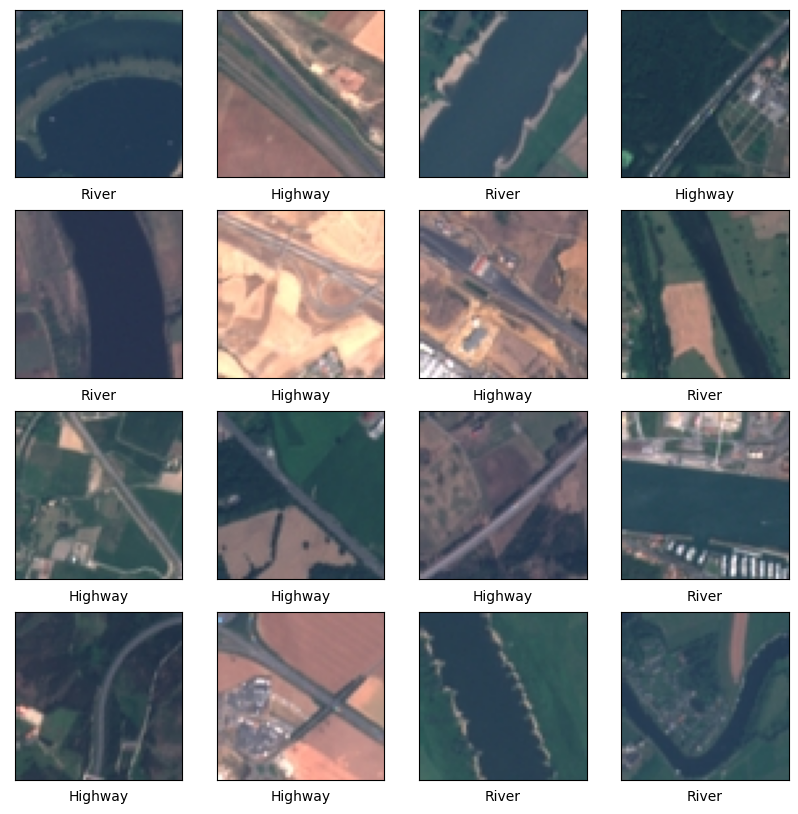

In [10]:
inspectData()    

<h2>Maak een model</h2>

<h3>Definieer de netwerktopologie</h3>

<h3>Exercise 1</h3>
<p>
    Vul de netwerktopologie tot een bruikbaar Neural Netwerk onstaat.
</p>

In [11]:
img_height = 64
img_width = 64

In [12]:
numberNames = len(labelNames)
# print(numberNames)

In [13]:
model = tf.keras.Sequential([
  keras.layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(img_height, img_width, 3)),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(10)
])

<h3>Definieer de trainparameters</h3>

In [14]:
lossFunction = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
gdAlgorithm = tf.keras.optimizers.Adam(learning_rate=0.001)
nrOfEpochs = 5

<h3>Train het model</h3>

In [15]:
model.compile(optimizer=gdAlgorithm, loss=lossFunction, metrics="accuracy")

In [16]:
# model.summary()

In [17]:
history = model.fit(trainSet, trainLabels, epochs=nrOfEpochs, batch_size=64, verbose=2, validation_data=(testSet, testLabels))

Epoch 1/5


: 

: 

In [ ]:
model.save("models_saved/model_2.h5", overwrite=True, include_optimizer=True)

In [ ]:
model.predict(testSet)

In [ ]:
predictionBatch = model.predict(testSet)
predictionEnhanced = np.argmax(predictionBatch, axis=-1)

print(predictionEnhanced)

labels = np.argmax(testLabels,axis=-1)

print(classification_report(labels, pred))

conf_matrix = tf.math.confusion_matrix(labels=testLabels, predictions=predictionEnhanced)

# print(conf_matrix)

# <h2>**Confusion Matrix**</h2>

<h3>Exercise 2.1</h3>
<p>
    Laat met een Confusion Matrix zien of het model in staat is de juiste class te vinden.
</p>

In [ ]:
actual = testLabels
predicted = predictionEnhanced

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Highway", "River"])
# Origineel: display_labels = [False, True]

cm_display.plot()
plt.show()

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = nrOfEpochs
epochs_range = range(epochs)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()